# 🏠 Zonaprop - Análisis Exploratorio de Datos (EDA)
Este notebook analiza datos de propiedades en alquiler en Córdoba extraídos de Zonaprop.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# Cargar datos limpios
df = pd.read_csv("../data/zonaprop_clean.csv")

# Vista general
print(f"🔢 Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()


🔢 Filas: 30, Columnas: 13


,titulo,precio_numerico,precio_por_m2,categoria_precio,metros_cuadrados,categoria_tamano,ambientes,dormitorios,banos,cocheras,barrio,ciudad,descripcion
0,50 m² tot.\n2 amb.\n1 dorm.\n1 baño,550000,11000.000000,Medio,50,Mediano,2,1,1,0,General Paz,Córdoba,Rue negocios inmobiliarios alquila departament...
1,45 m² tot.\n5 amb.\n1 dorm.\n1 baño,540000,12000.000000,Medio,45,Pequeño,5,1,1,0,General Paz,Córdoba,Cabalen propiedades ofrece en alquiler departa...
2,60 m² tot.\n2 amb.\n1 dorm.\n1 baño\n1 coch.,400000,6666.666667,Económico,60,Mediano,2,1,1,1,General Paz,Córdoba,Jose Barrionuevo - bienes raíces- ofrece en al...
3,81 m² tot.\n5 amb.\n2 dorm.\n1 baño\n1 coch.,950000,11728.395062,Alto,81,Grande,5,2,1,1,Nueva Córdoba,Córdoba,Catiñeira Salguero ofrece en alquiler departam...
4,114 m² tot.\n3 amb.\n2 dorm.\n2 baños,1400000,12280.701754,Premium,114,Grande,3,2,2,0,Valle Escondido,Córdoba,"Departamento en alquiler en la rosella villa, ..."


In [4]:
# Revisar valores nulos
df.isnull().sum()


titulo              0
precio_numerico     0
precio_por_m2       0
categoria_precio    0
metros_cuadrados    0
categoria_tamano    0
ambientes           0
dormitorios         0
banos               0
cocheras            0
barrio              0
ciudad              0
descripcion         0
dtype: int64

In [5]:
# Verificar tipos de datos
df.dtypes


titulo               object
precio_numerico       int64
precio_por_m2       float64
categoria_precio     object
metros_cuadrados      int64
categoria_tamano     object
ambientes             int64
dormitorios           int64
banos                 int64
cocheras              int64
barrio               object
ciudad               object
descripcion          object
dtype: object

In [6]:
# Estadísticas descriptivas de variables numéricas
df.describe()


,precio_numerico,precio_por_m2,metros_cuadrados,ambientes,dormitorios,banos,cocheras
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,6.843333e+05,10522.363271,229.733333,3.066667,1.433333,1.166667,0.233333
std,2.683369e+05,3843.116040,901.495842,1.412587,0.504007,0.461133,0.430183
min,4.000000e+05,240.000000,40.000000,2.000000,1.000000,1.000000,0.000000
25%,4.675000e+05,8744.623656,45.000000,2.000000,1.000000,1.000000,0.000000
50%,5.800000e+05,10381.263617,54.500000,3.000000,1.000000,1.000000,0.000000
75%,8.250000e+05,12266.081871,78.250000,3.750000,2.000000,1.000000,0.000000
max,1.400000e+06,22222.222222,5000.000000,8.000000,2.000000,3.000000,1.000000


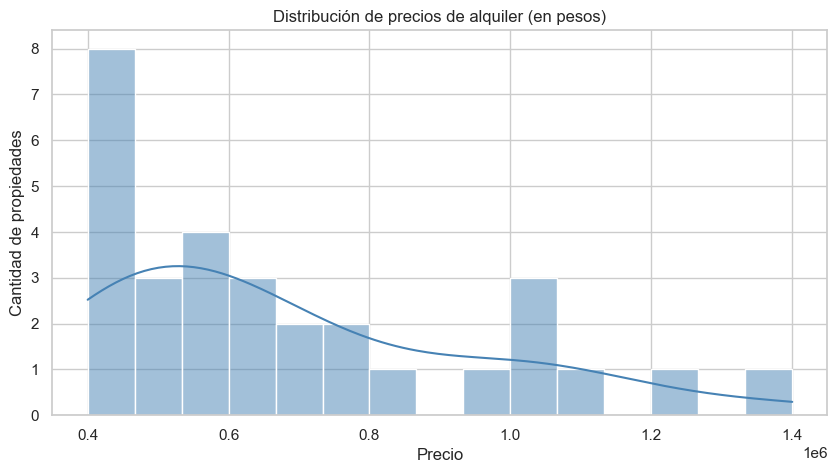

In [7]:
# Histograma del precio de alquiler
plt.figure(figsize=(10, 5))
sns.histplot(df['precio_numerico'], bins=15, kde=True, color='steelblue')
plt.title("Distribución de precios de alquiler (en pesos)")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.show()


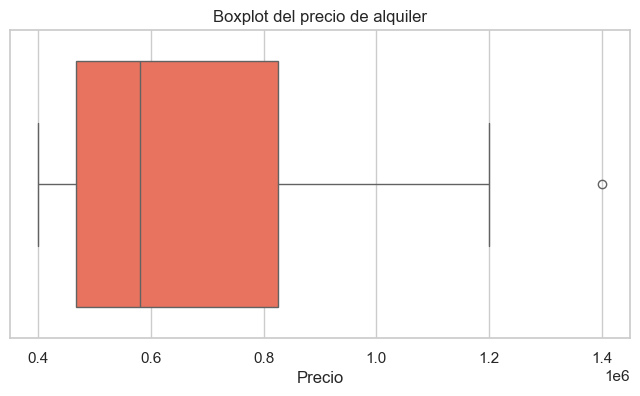

In [8]:
# Boxplot del precio para detectar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['precio_numerico'], color='tomato')
plt.title("Boxplot del precio de alquiler")
plt.xlabel("Precio")
plt.show()


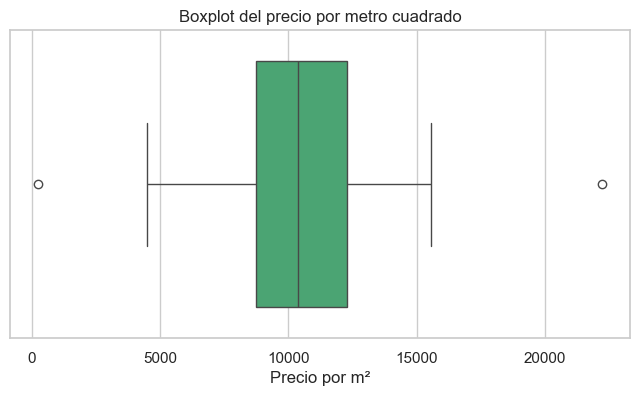

In [9]:
# Boxplot del precio por m²
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['precio_por_m2'], color='mediumseagreen')
plt.title("Boxplot del precio por metro cuadrado")
plt.xlabel("Precio por m²")
plt.show()


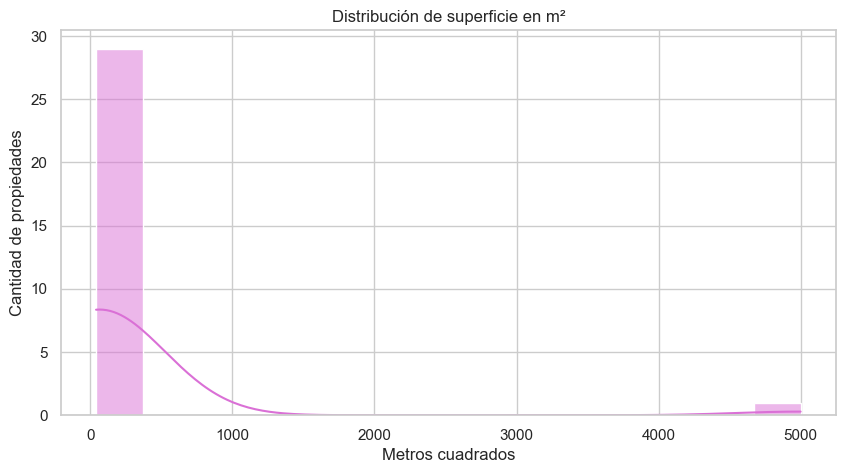

In [10]:
# Histograma de la superficie
plt.figure(figsize=(10, 5))
sns.histplot(df['metros_cuadrados'], bins=15, kde=True, color='orchid')
plt.title("Distribución de superficie en m²")
plt.xlabel("Metros cuadrados")
plt.ylabel("Cantidad de propiedades")
plt.show()


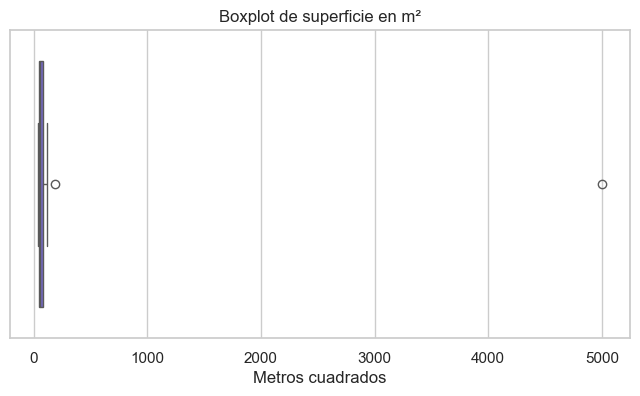

In [11]:
# Boxplot para detectar propiedades extremadamente grandes
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['metros_cuadrados'], color='slateblue')
plt.title("Boxplot de superficie en m²")
plt.xlabel("Metros cuadrados")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_27332\3820832319.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barrio_precio["mean"], y=barrio_precio.index, palette="viridis")


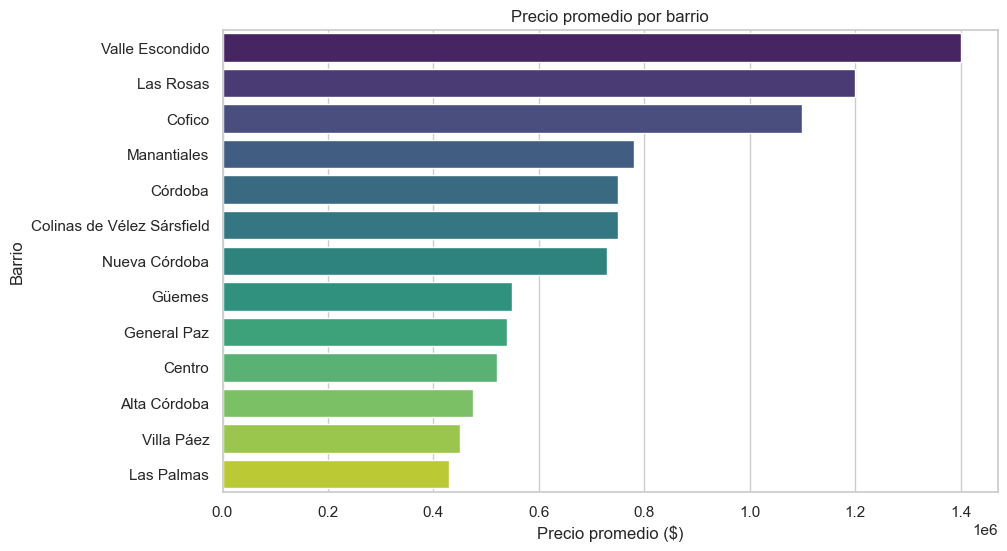

In [12]:
# Promedio de precio por barrio
barrio_precio = df.groupby("barrio")["precio_numerico"].agg(["count", "mean", "min", "max"]).sort_values("mean", ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=barrio_precio["mean"], y=barrio_precio.index, palette="viridis")
plt.title("Precio promedio por barrio")
plt.xlabel("Precio promedio ($)")
plt.ylabel("Barrio")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_27332\2437316794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barrio_m2, y=barrio_m2.index, palette="mako")


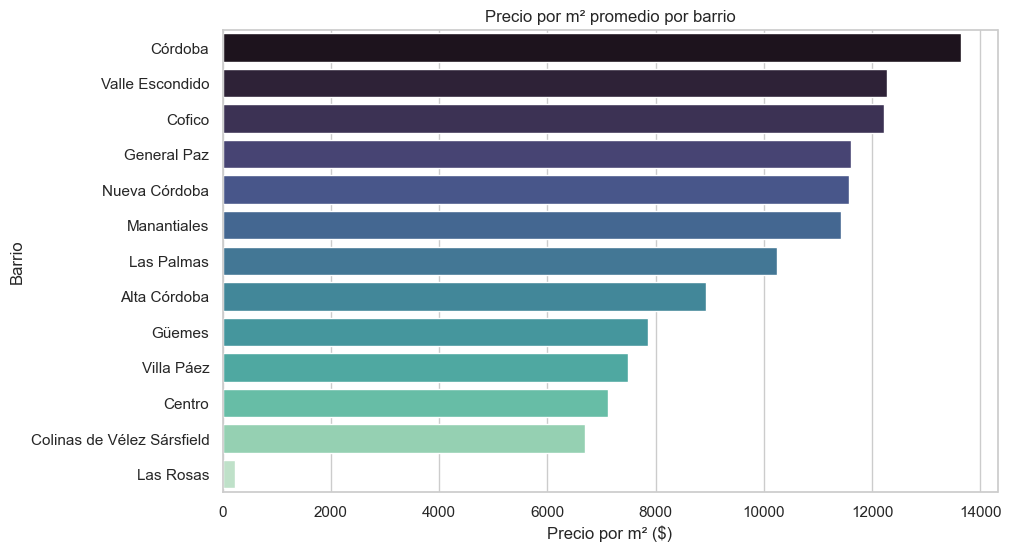

In [13]:
# Precio por m² promedio por barrio
barrio_m2 = df.groupby("barrio")["precio_por_m2"].mean().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=barrio_m2, y=barrio_m2.index, palette="mako")
plt.title("Precio por m² promedio por barrio")
plt.xlabel("Precio por m² ($)")
plt.ylabel("Barrio")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_27332\3106784507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ambientes_precio.index, y=ambientes_precio.values, palette="Blues_d")


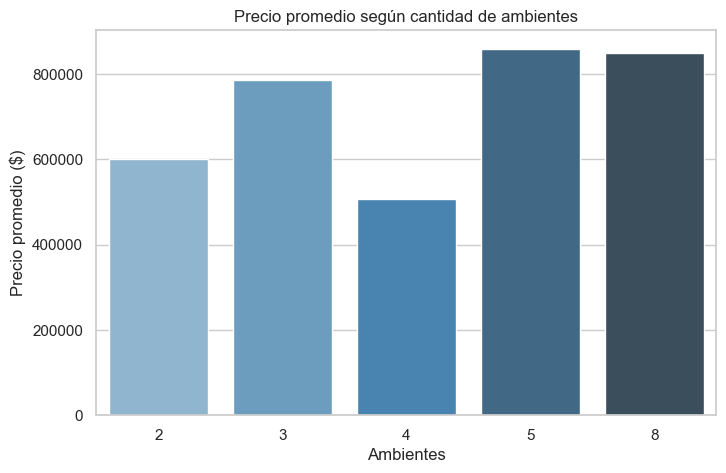

In [14]:
# Agrupación por ambientes
ambientes_precio = df.groupby("ambientes")["precio_numerico"].mean().sort_index()

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=ambientes_precio.index, y=ambientes_precio.values, palette="Blues_d")
plt.title("Precio promedio según cantidad de ambientes")
plt.xlabel("Ambientes")
plt.ylabel("Precio promedio ($)")
plt.show()


C:\Users\Guido Lujan.Desarrollo-Lemp\AppData\Local\Temp\ipykernel_27332\2975433122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="ambientes", palette="pastel")


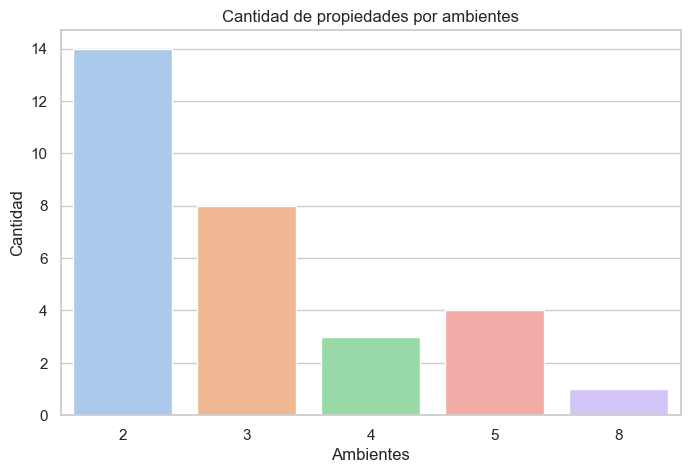

In [15]:
# Conteo de propiedades según ambientes
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ambientes", palette="pastel")
plt.title("Cantidad de propiedades por ambientes")
plt.xlabel("Ambientes")
plt.ylabel("Cantidad")
plt.show()


c:\Users\Guido Lujan.Desarrollo-Lemp\Documents\MIO\zonaprop-scraper\zp_scrapper\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


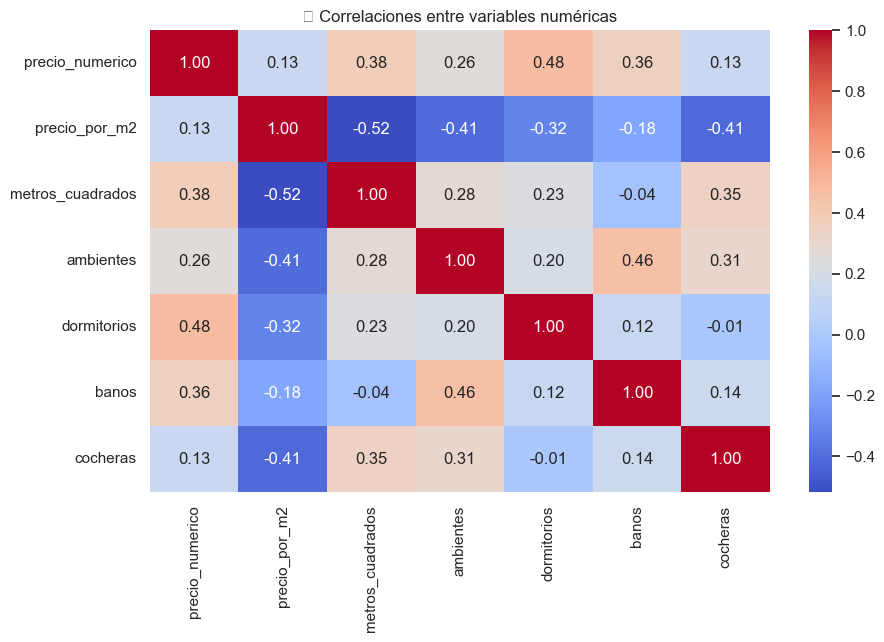

In [16]:
# Matriz de correlación
corr = df[["precio_numerico", "precio_por_m2", "metros_cuadrados", "ambientes", "dormitorios", "banos", "cocheras"]].corr()

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Correlaciones entre variables numéricas")
plt.show()


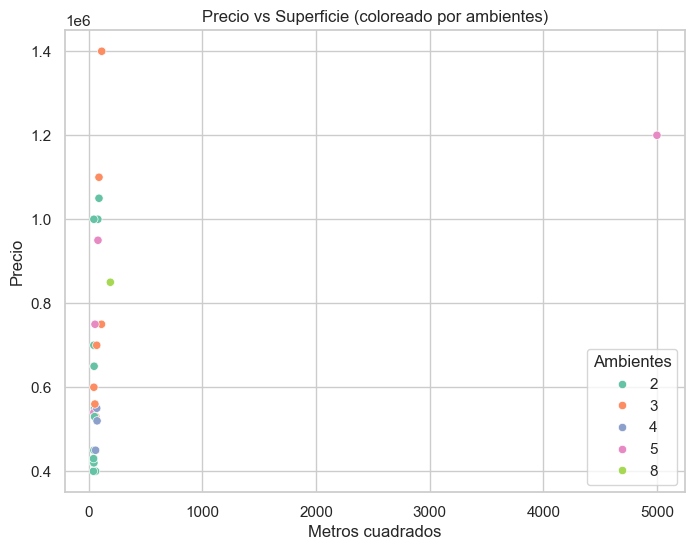

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="metros_cuadrados", y="precio_numerico", data=df, hue="ambientes", palette="Set2")
plt.title("Precio vs Superficie (coloreado por ambientes)")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")
plt.legend(title="Ambientes")
plt.show()


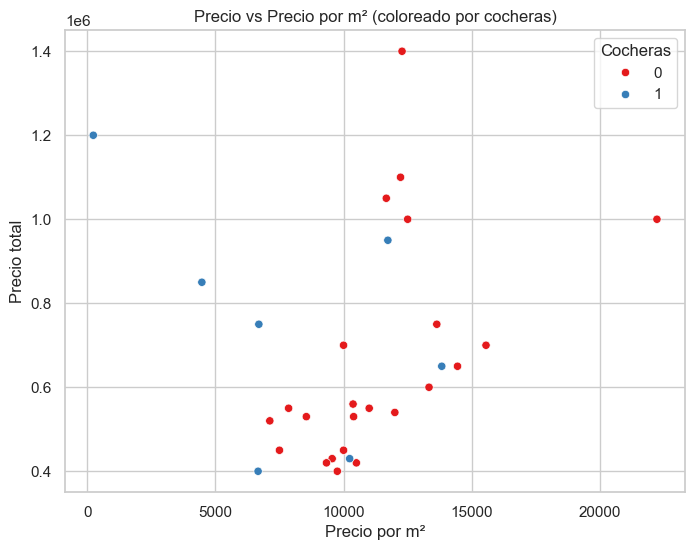

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="precio_por_m2", y="precio_numerico", data=df, hue="cocheras", palette="Set1")
plt.title("Precio vs Precio por m² (coloreado por cocheras)")
plt.xlabel("Precio por m²")
plt.ylabel("Precio total")
plt.legend(title="Cocheras")
plt.show()


### 📌 Conclusiones del EDA

- El precio promedio de alquiler en Córdoba ronda los **$680.000**, con valores entre $400.000 y $1.400.000.
- Algunos barrios como **Nueva Córdoba** o **Villa Belgrano** tienden a tener precios por m² más altos.
- La mayoría de los departamentos tienen **1 o 2 dormitorios**, y **sin cochera**.
- Hay propiedades con superficies exageradas (>1000 m²), que son claros **outliers**.
- Existe una **correlación moderada** entre superficie y precio total, pero no tan fuerte en precio por m².
- Las cocheras parecen tener poco impacto directo en el precio total, pero sí podrían hacerlo en barrios premium.
